In [1]:
#imports
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from collections import Counter

from sklearn import preprocessing

In [4]:
def getTheCleansedData():
    df = pd.read_csv(r'C:\Users\padmaraj.bhat\OneDrive - Accenture\Downloads\TrainData_PA.csv')
    df.property_type = df.property_type.fillna('NA')
    key_columns = [x for x in list(df) if x != 'time']
    df = df.sort_values(by='time', ascending=False)
    df = df.drop_duplicates(key_columns,keep='first')
    
    colorMap = {'Condo': 'red', 'SFR': 'green', 'Duplex': 'black', 'NA': 'blue', 'Quadplex': 'yellow', 'Triplex':'orange', }
    df['property_type_color_map'] = df.property_type.apply(lambda x : colorMap[x])
    
    return df
df = getTheCleansedData()

##### We have highest rent in the year : 1960

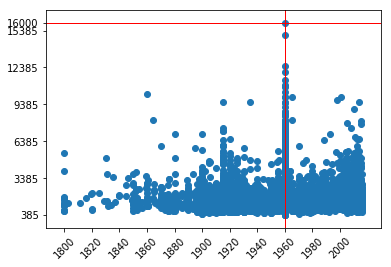

In [5]:
#let us plot the hot in mind
year = list(df[df.rent == df['rent'].max()]['yearbuilt'])[0]
#y_ticks = (df.rent.min() + df.rent.max())/4
y_ticks = list(np.arange(df.rent.min(), df.rent.max(), 3000))
y_ticks.append(df.rent.max())

fig, ax = plt.subplots()
ax.axhline(df['rent'].max(),color='r',lw=1)
ax.axvline(year,color='r',lw=1)
plt.xticks(np.arange(df.yearbuilt.min(), df.yearbuilt.max()+1, 20),rotation=45)

plt.yticks(y_ticks)


plt.scatter(df['yearbuilt'],df['rent'])
plt.show()

##### * Till 1900 the data are not so reliable or stable.  i.e. it has to fluctuation when observed in the plot and hence there is no regular pattern there.
##### * And Also, 1960 highest rent seems like out of the blue. Someone really got lucky or it is an data entry error. It is a outlier for sure.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18080 entries, 0 to 18202
Data columns (total 41 columns):
county                     18054 non-null object
city                       18080 non-null object
zipcode                    18054 non-null float64
address                    17373 non-null object
state                      18080 non-null object
rent                       18080 non-null int64
latitude                   18080 non-null float64
longitude                  18080 non-null float64
cemetery_dist_miles        18080 non-null float64
nationalhighway_miles      18080 non-null float64
railline_miles             18080 non-null float64
starbucks_miles            18080 non-null float64
walmart_miles              18080 non-null float64
hospital_miles             18080 non-null float64
physician_dist_miles       18080 non-null float64
dentist_dist_miles         18080 non-null float64
opt_dist_miles             18080 non-null float64
vet_dist_miles             18080 non-null float

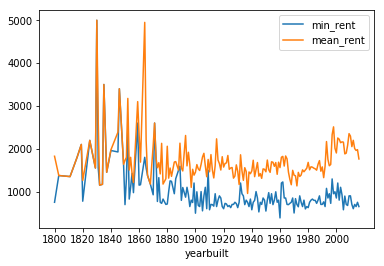

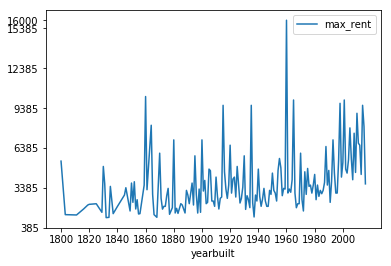

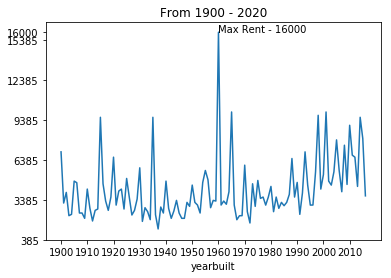

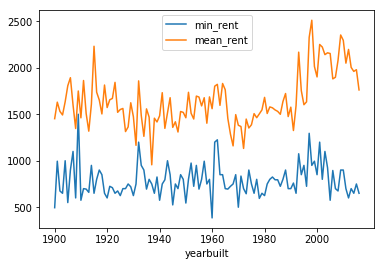

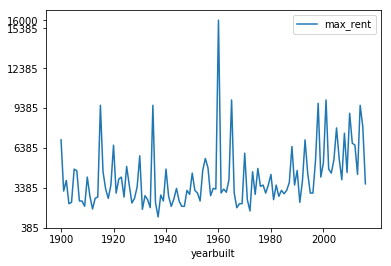

In [7]:
def displayRentPerYear(df):
    temp = pd.DataFrame()
    temp1 = df[['yearbuilt','rent']].groupby('yearbuilt').agg('max').reset_index()
    temp[['yearbuilt','max_rent']] = temp1[['yearbuilt','rent']]
    temp1 = df[['yearbuilt','rent']].groupby('yearbuilt').agg('min').reset_index()
    temp['min_rent'] = temp1['rent']
    temp1 = df[['yearbuilt','rent']].groupby('yearbuilt').agg('mean').reset_index()
    temp['mean_rent'] = temp1['rent']
    #temp.plot.line('yearbuilt','rent')
    #temp.plot.line('yearbuilt','min_rent')
    temp.plot('yearbuilt',['min_rent','mean_rent'],xticks=(np.arange(df.yearbuilt.min(), df.yearbuilt.max()+1, 20)))
    temp.plot('yearbuilt','max_rent',xticks=(np.arange(df.yearbuilt.min(), df.yearbuilt.max()+1, 20)), yticks=y_ticks)
    fig, ax = plt.subplots()
    #ax.axhline(df['rent'].max(),color='r',lw=1)
    #ax.axvline(year,color='r',lw=1)
    ax.figure.text = 'Zoomed'
    ax.text(1960,int(temp.max_rent.max()),'Max Rent - '+str(temp.max_rent.max()))
    temp = temp[temp.yearbuilt > 1899]
    temp.plot('yearbuilt',['min_rent','mean_rent'],xticks=(np.arange(temp.yearbuilt.min(), temp.yearbuilt.max()+1, 20)))
    temp.plot('yearbuilt','max_rent',xticks=(np.arange(temp.yearbuilt.min(), temp.yearbuilt.max()+1, 20)), yticks=y_ticks)
    temp.plot('yearbuilt','max_rent',xticks=(np.arange(temp.yearbuilt.min(), temp.yearbuilt.max()+1, 10)), yticks=y_ticks,ax=ax,\
              legend=None,title="From 1900 - 2020")

displayRentPerYear(df)

##### Let us plot the rent pattern for property_type

C:\Users\padmaraj.bhat\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


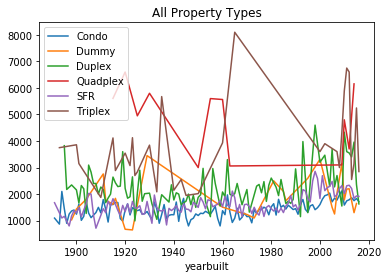

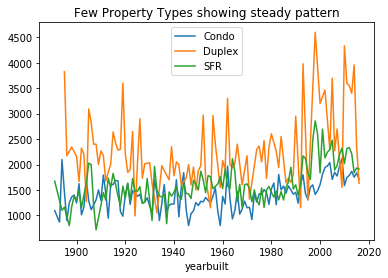

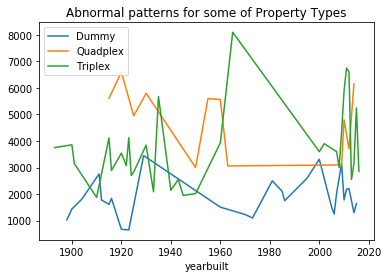

In [8]:
'''Condo                    15515 non-null int64
Duplex                   15515 non-null int64
Quadplex                 15515 non-null int64
SFR                      15515 non-null int64
Triplex   '''

def displayRentPerYearPerPropertyType():
    df = pd.read_csv(r'C:\Users\padmaraj.bhat\OneDrive - Accenture\Downloads\TrainData_PA.csv')
    temp = df[['yearbuilt','rent','property_type']]
    temp.property_type = temp.property_type.fillna('Dummy')
    
    #little bit of cleaning
    temp = temp[temp.yearbuilt > 1890]
    #temp = temp[temp.rent < temp.rent.max()]
    #print(temp.property_type.unique())
    
    temp1 = temp.groupby(['yearbuilt','property_type']).agg('mean').reset_index()
        
    #temp1.property_type = temp1.property_type.apply(lambda x : getcolor(x))
    fig, ax = plt.subplots()
    
    for key, grp in temp1.groupby(['property_type']):
        #print(type(key))
        ax = grp.plot(ax=ax, kind='line', x='yearbuilt', y='rent',label=key,title='All Property Types' )
    plt.show()
    
    fig, ax = plt.subplots()
    
    for key, grp in temp1.groupby(['property_type']):
        #print(type(key))
        if key in ['Condo','SFR','Duplex']:
            ax = grp.plot(ax=ax, kind='line', x='yearbuilt', y='rent',label=key, \
                          title = 'Few Property Types showing steady pattern' )
    plt.show()
    fig, ax = plt.subplots()
    for key, grp in temp1.groupby(['property_type']):
        #print(type(key))
        if key in ['Dummy','Quadplex','Triplex']:
            ax = grp.plot(ax=ax, kind='line', x='yearbuilt', y='rent',label=key,\
                         title='Abnormal patterns for some of Property Types')
    plt.show()

displayRentPerYearPerPropertyType()

In [9]:
list(df)

['county',
 'city',
 'zipcode',
 'address',
 'state',
 'rent',
 'latitude',
 'longitude',
 'cemetery_dist_miles',
 'nationalhighway_miles',
 'railline_miles',
 'starbucks_miles',
 'walmart_miles',
 'hospital_miles',
 'physician_dist_miles',
 'dentist_dist_miles',
 'opt_dist_miles',
 'vet_dist_miles',
 'farmers_miles',
 'time',
 'bed',
 'bath',
 'halfbath',
 'sqft',
 'property_type',
 'garage',
 'yearbuilt',
 'pool',
 'fireplace',
 'patio',
 'lotsize',
 'Census_MedianIncome',
 'CollegeGrads',
 'WhiteCollar',
 'Schools',
 'Unemployment',
 'EmploymentDiversity',
 'Census_Vacancy',
 'Crime_Rate',
 'HomePrice',
 'property_type_color_map']

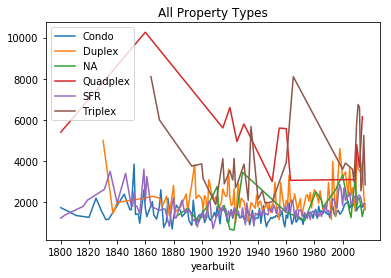

In [10]:
 
def test():
    df = getTheCleansedData()
    
    temp = df[['yearbuilt','property_type','rent']]
    temp1 = df.groupby(['property_type','yearbuilt']).agg('mean').reset_index()
        
    xticks = range(df.yearbuilt.min(),df.yearbuilt.max(),20)
    fig, ax = plt.subplots()
    
    for key, grp in temp1.groupby(['property_type']):
        #print(type(key))
        ax = grp.plot(ax=ax, kind='line', x='yearbuilt', y='rent',label=key,title='All Property Types', xticks=xticks )
    plt.show()
    
    return

test()

In [11]:
df[df.yearbuilt.isin(range(1820,1900))]

county             city  zipcode  \
15019  PHILADELPHIA     PHILADELPHIA  19144.0   
2790        BEDFORD      SCHELLSBURG  15559.0   
8257      LANCASTER        LANCASTER  17602.0   
8251      LANCASTER           LITITZ  17543.0   
8315      LANCASTER        LANCASTER  17602.0   
8303      LANCASTER          MANHEIM  17545.0   
8662         LEHIGH       SLATINGTON  18080.0   
10623    MONTGOMERY         LANSDALE  19446.0   
2046      ALLEGHENY       PITTSBURGH  15232.0   
2148      ALLEGHENY       PITTSBURGH  15233.0   
10441    MONTGOMERY       NORRISTOWN  19401.0   
10457    MONTGOMERY       NORRISTOWN  19401.0   
10872    MONTGOMERY         HATFIELD  19440.0   
1819      ALLEGHENY        HOMESTEAD  15120.0   
10714    MONTGOMERY       NORRISTOWN  19401.0   
10372    MONTGOMERY       NORRISTOWN  19401.0   
2479      ALLEGHENY       PITTSBURGH  15232.0   
14892  PHILADELPHIA     PHILADELPHIA  19147.0   
2576      ALLEGHENY       PITTSBURGH  15201.0   
2588      ALLEGHENY       PITTSBURGH  15203.0   
10286    MONTGOMERY       NORRISTOWN  19401.0   
10270    MONTGOMERY        POTTSTOWN  19464.0   
2335      ALLEGHENY       PITTSBURGH  15227.0   
2350      ALLEGHENY       PITTSBURGH  15201.0   
2290      ALLEGHENY       PITTSBURGH  15206.0   
17429    WASHINGTON       WASHINGTON  15301.0   
2386      ALLEGHENY        HOMESTEAD  15120.0   
16057  PHILADELPHIA     PHILADELPHIA  19103.0   
4559        CHESTER     WEST CHESTER  19382.0   
16719  PHILADELPHIA     PHILADELPHIA  19107.0   
...             ...              ...      ...   
2486      ALLEGHENY       PITTSBURGH  15203.0   
2621      ALLEGHENY       PITTSBURGH  15208.0   
2459      ALLEGHENY       PITTSBURGH  15203.0   
2330      ALLEGHENY       PITTSBURGH  15203.0   
11997   NORTHAMPTON        BETHLEHEM  18018.0   
11687   NORTHAMPTON        BETHLEHEM  18018.0   
10922    MONTGOMERY       NORRISTOWN  19401.0   
11148    MONTGOMERY       NORRISTOWN  19401.0   
11029    MONTGOMERY       NORRISTOWN  19401.0   
10638    MONTGOMERY        POTTSTOWN  19464.0   
10821    MONTGOMERY        PENNSBURG  18073.0   
11324    MONTGOMERY   LAFAYETTE HILL  19444.0   
13438  PHILADELPHIA     PHILADELPHIA  19127.0   
8341      LANCASTER          MANHEIM  17545.0   
8737         LEHIGH         OREFIELD  18069.0   
8701         LEHIGH       SLATINGTON  18080.0   
8530         LEHIGH        ALLENTOWN  18102.0   
8581         LEHIGH        ALLENTOWN  18103.0   
8831         LEHIGH       SLATINGTON  18080.0   
10567    MONTGOMERY       NORRISTOWN  19401.0   
10482    MONTGOMERY       BRIDGEPORT  19405.0   
10515    MONTGOMERY       ROYERSFORD  19468.0   
10528    MONTGOMERY        POTTSTOWN  19464.0   
10332    MONTGOMERY       NORRISTOWN  19401.0   
10036    MONTGOMERY  KING OF PRUSSIA  19406.0   
9002         LEHIGH    CENTER VALLEY  18034.0   
8870         LEHIGH       SLATINGTON  18080.0   
9306       LYCOMING            MUNCY  17756.0   
9379       LYCOMING            MUNCY  17756.0   
9408       LYCOMING            MUNCY  17756.0   

                                      address state  rent   latitude  \
15019          Germantown Philadelphia County    PA  1675  40.038277   
2790           3789 Pitt St #A Bedford County    PA   855  40.049160   
8257                            31 E JAMES ST    PA  1300  40.046258   
8251                     1027 FRUITVILLE PIKE    PA  1650  40.121836   
8315                            113 S DUKE ST    PA  2200  40.036146   
8303                       127 W FERDINAND ST    PA  1600  40.160090   
8662                              350 MAIN ST    PA   750  40.753069   
10623                            205 GREEN ST    PA  1295  40.239670   
2046                      5130 WESTMINSTER PL    PA  7000  40.448639   
2148                        1306 SHEFFIELD ST    PA  1300  40.453594   
10441                       910 W MARSHALL ST    PA  2100  40.122383   
10457                           645 CORSON ST    PA  1250  40.120267   
10872                        1301 DEER

C:\Users\padmaraj.bhat\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


rent                     1.000000
bath                     0.697033
bed                      0.567084
sqft                     0.423986
CollegeGrads             0.327992
WhiteCollar              0.324943
HomePrice                0.307455
Census_MedianIncome      0.231945
fireplace                0.199955
halfbath                 0.166411
zipcode                  0.149380
vet_dist_miles           0.129342
garage                   0.117934
starbucks_miles          0.110549
Census_Vacancy           0.072238
EmploymentDiversity      0.067369
farmers_miles            0.066874
hospital_miles           0.061187
Unemployment             0.060953
pool                     0.060580
yearbuilt                0.058772
latitude                 0.055222
patio                    0.045028
physician_dist_miles     0.039704
time                     0.037832
walmart_miles            0.036871
longitude                0.035929
Crime_Rate               0.034368
Schools                  0.030688
dentist_dist_m

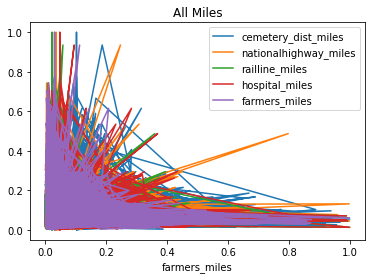

hospital_miles           1.000000
railline_miles           0.649964
dentist_dist_miles       0.646585
physician_dist_miles     0.618823
opt_dist_miles           0.613787
farmers_miles            0.594129
cemetery_dist_miles      0.531317
starbucks_miles          0.522016
nationalhighway_miles    0.438850
walmart_miles            0.404961
vet_dist_miles           0.312193
Schools                  0.264697
lotsize                  0.252692
Census_Vacancy           0.249568
fireplace                0.202730
Crime_Rate               0.196073
Census_MedianIncome      0.185391
EmploymentDiversity      0.161352
garage                   0.160271
yearbuilt                0.116377
Unemployment             0.101341
CollegeGrads             0.098383
latitude                 0.093433
WhiteCollar              0.091591
time                     0.086768
sqft                     0.081589
pool                     0.066036
rent                     0.061187
zipcode                  0.049942
bath          

In [12]:

def rentMiles():
    df = getTheCleansedData()
    #print(list(df))
    '''miles_columns = ['cemetery_dist_miles', 'nationalhighway_miles', 'railline_miles', \
                     'starbucks_miles', 'walmart_miles', 'hospital_miles', 'physician_dist_miles', \
                     'dentist_dist_miles', 'opt_dist_miles', 'vet_dist_miles', 'farmers_miles']'''
    
    miles_columns = ['cemetery_dist_miles', 'nationalhighway_miles', 'railline_miles', \
                     'hospital_miles', \
                      'farmers_miles']
    df1 = df[miles_columns]
    df1['rent'] = df['rent']
    df1 = df1.reset_index()
    print(df.corr().abs()['rent'].sort_values(ascending=False))
    
    '''s = c.unstack()
    so = s.sort_values(kind="quicksort")
    #df_temp = pd.DataFrame(so)
    print(so[-60:])'''
    
    min_max_scaler = preprocessing.MinMaxScaler()
    np_scaled = min_max_scaler.fit_transform(df1)
    df_normalized = pd.DataFrame(np_scaled,columns=df1.columns)
    
    fig, ax = plt.subplots()
    for c in miles_columns:
        ax = df_normalized.plot(ax=ax, kind='line', x=c, y='rent',label=c,title='All Miles' )
    plt.show()
    print(df.corr().abs()['hospital_miles'].sort_values(ascending=False))
rentMiles() 

In [13]:
def corrPrint():
    df = getTheCleansedData()
    df_corr = df.corr().abs()
    for c in list(df_corr):
        print(df_corr[c].sort_values(ascending = False)[:5])
        
corrPrint()    

zipcode                1.000000
longitude              0.228522
vet_dist_miles         0.166061
Census_MedianIncome    0.156508
rent                   0.149380
Name: zipcode, dtype: float64
rent            1.000000
bath            0.697033
bed             0.567084
sqft            0.423986
CollegeGrads    0.327992
Name: rent, dtype: float64
latitude           1.000000
longitude          0.283620
vet_dist_miles     0.106568
farmers_miles      0.099108
starbucks_miles    0.096622
Name: latitude, dtype: float64
longitude         1.000000
latitude          0.283620
zipcode           0.228522
Census_Vacancy    0.094195
patio             0.069810
Name: longitude, dtype: float64
cemetery_dist_miles     1.000000
hospital_miles          0.531317
dentist_dist_miles      0.445907
physician_dist_miles    0.432330
railline_miles          0.421692
Name: cemetery_dist_miles, dtype: float64
nationalhighway_miles    1.000000
physician_dist_miles     0.515508
opt_dist_miles           0.504211
dentist_dis

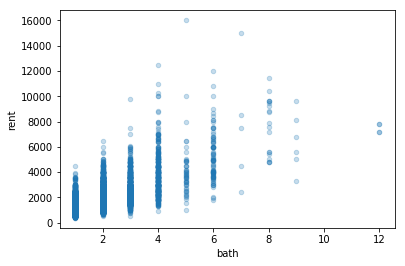

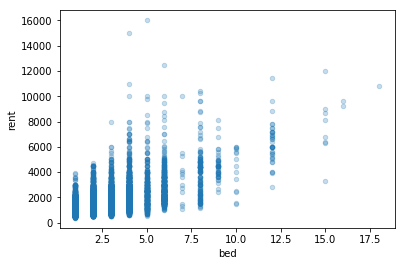

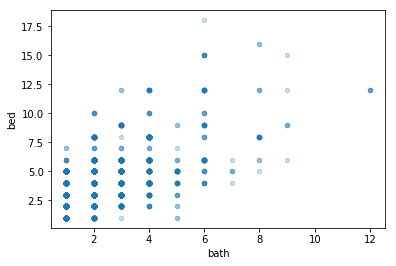

In [14]:
def rentVsBathBed():
    df = getTheCleansedData()
    df.plot.scatter('bath','rent',alpha=.25)
    df.plot.scatter('bed','rent',alpha=.25)
    df.plot.scatter('bath','bed',alpha=.25)
rentVsBathBed()

Let us see what is yearbuilt in when railwaylines are far


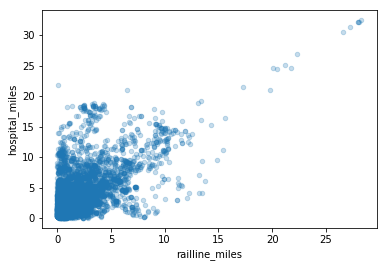

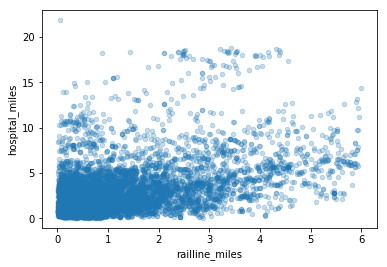

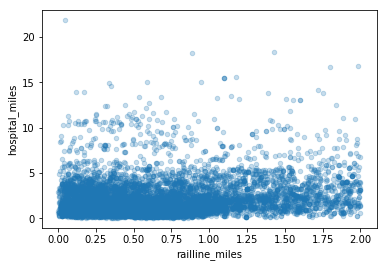

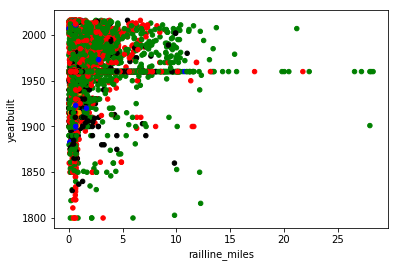

In [15]:
def railwayVsHospital():
    df =getTheCleansedData()
    df.plot.scatter('railline_miles','hospital_miles', alpha = .25)
    
    temp = df[df.railline_miles <6]
    temp.plot.scatter('railline_miles','hospital_miles', alpha = .25)
    
    temp = df[df.railline_miles <2]
    temp.plot.scatter('railline_miles','hospital_miles', alpha = .25)
    
    print("Let us see what is yearbuilt in when railwaylines are far")
    #df[df.railline_miles > 5].plot.scatter('railline_miles','yearbuilt')
    list1= list(df.property_type_color_map)
    df.plot.scatter('railline_miles','yearbuilt',c=list1)
railwayVsHospital()

##### In all the years people always targetted to be near raillines. It is been a trend that usually only SFR property are away from raillines. May be they like quiet places.

In [16]:
def numPropertyPerYear():
    df = getTheCleansedData()
    print(Counter(df[df.railline_miles > 10].property_type))
    print(Counter(df[df.railline_miles <= 10].property_type))
    print(df[['property_type','lotsize','railline_miles']].groupby('property_type').agg('mean').reset_index())
    print(df[['property_type','lotsize','railline_miles']][df.railline_miles > 10].groupby('property_type').agg('mean').reset_index())
    print(df[['property_type','lotsize','railline_miles']][df.railline_miles <= 10].groupby('property_type').agg('mean').reset_index())
numPropertyPerYear()

Counter({'SFR': 65, 'Condo': 11, 'Duplex': 5, 'NA': 1})
Counter({'Condo': 7354, 'SFR': 6003, 'NA': 2685, 'Duplex': 1638, 'Triplex': 238, 'Quadplex': 80})
  property_type      lotsize  railline_miles
0         Condo  3215.115589        0.842856
1        Duplex  4156.721992        0.929850
2            NA  3223.630566        0.756152
3      Quadplex  2150.908333        0.612393
4           SFR  4402.934296        1.467670
5       Triplex  2074.841332        0.485334
  property_type      lotsize  railline_miles
0         Condo  3975.434749       12.801362
1        Duplex  6102.158984       11.242997
2            NA  2872.730796       10.783933
3           SFR  5373.951103       13.662306
  property_type      lotsize  railline_miles
0         Condo  3213.978315        0.824968
1        Duplex  4150.783540        0.898369
2            NA  3223.761255        0.752417
3      Quadplex  2150.908333        0.612393
4           SFR  4392.420204        1.335627
5       Triplex  2074.841332        

##### Property which are away from raillines does have bigger lotsize. They are also mostly Single Family Residentials (SFR).
https://www.movoto.com/foundation/real-estate-concepts/property-type-sfr-what-is-it-and-what-does-it-mean-for-zoning/

   yearbuilt  rent
0       1800    12
1       1803     1
2       1811     1
3       1816     1
4       1819     1


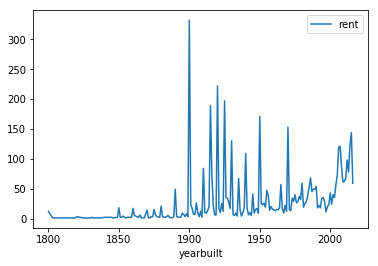

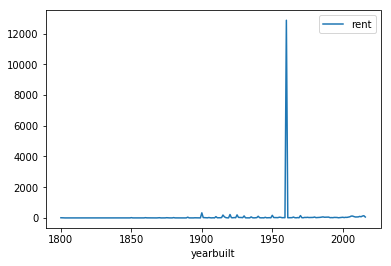

In [17]:
def numPropertyPerYear():
    x=y=[]
    df = getTheCleansedData()
    df2 = df[['yearbuilt','rent']].groupby('yearbuilt').agg('count').reset_index()
    print(df2.head())
    df2[df2.yearbuilt != 1960].plot('yearbuilt','rent')
    df2.plot('yearbuilt','rent')
    
    #df2.plot(legend=None)
    #print(df2)
numPropertyPerYear()

##### There has been peak of house construction during 1900 and 1960
* http://statemuseumpa.org/levittown/one/b.html
* https://www.thoughtco.com/the-post-war-us-economy-1945-to-1960-1148153
* https://www.theatlantic.com/business/archive/2015/09/the-post-war-american-home/407227/

C:\Users\padmaraj.bhat\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


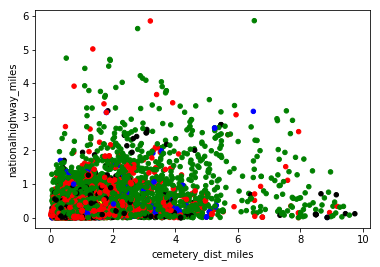

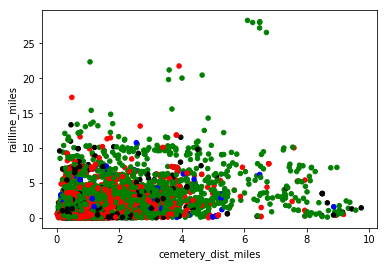

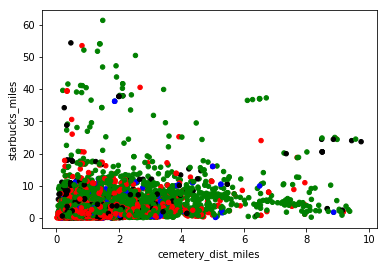

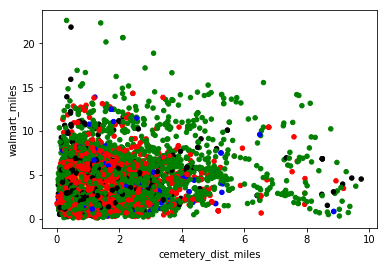

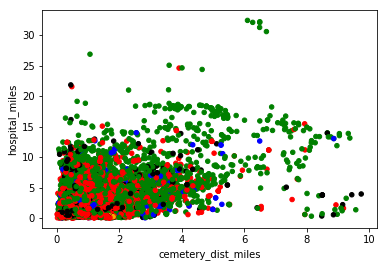

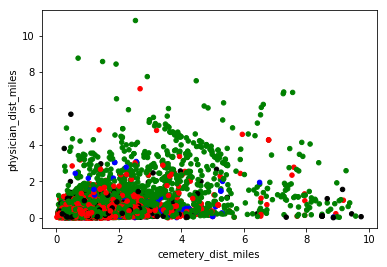

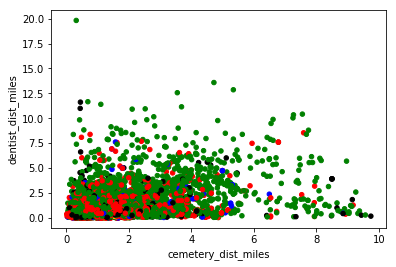

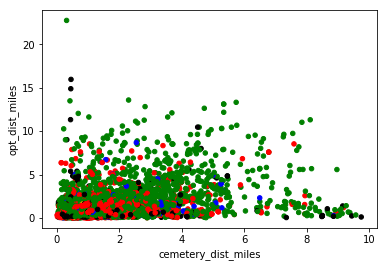

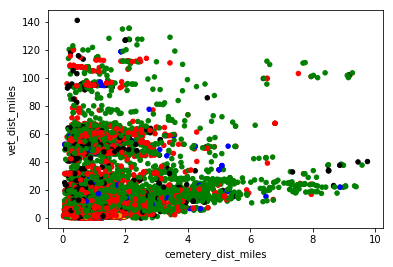

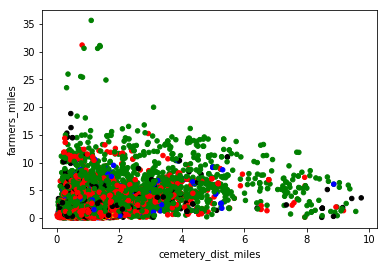

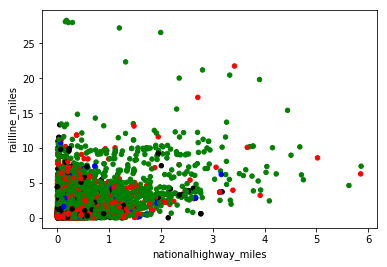

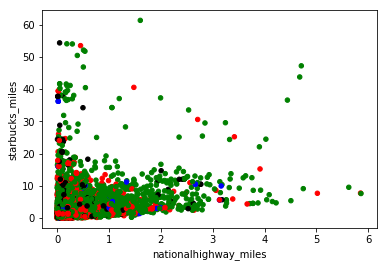

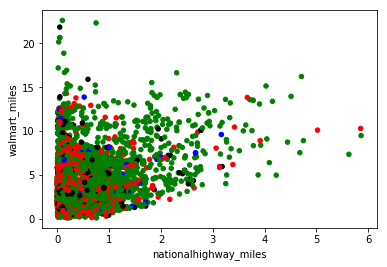

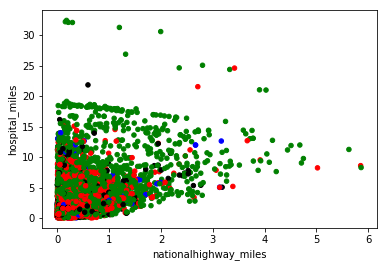

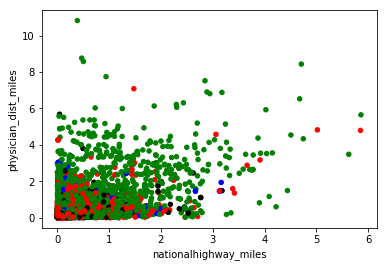

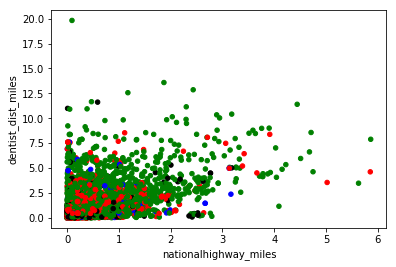

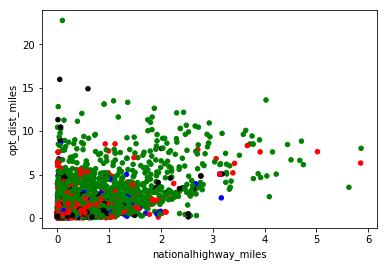

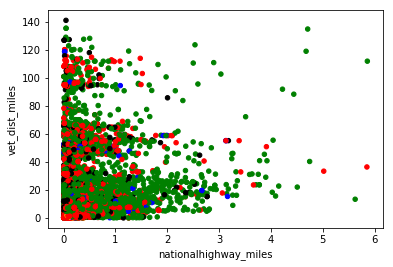

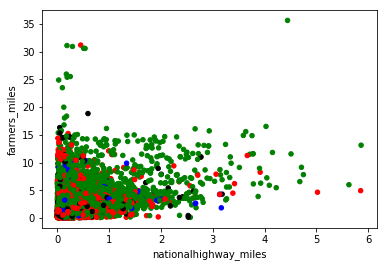

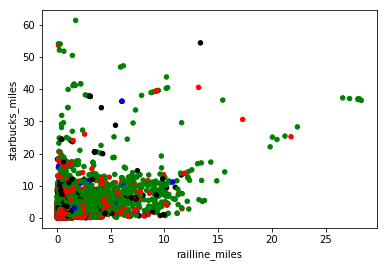

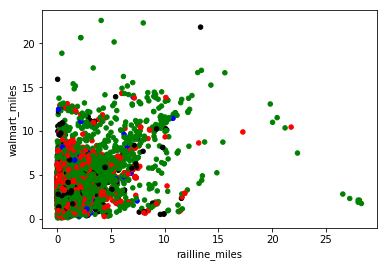

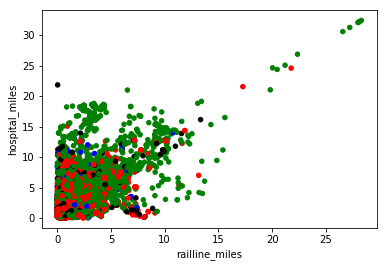

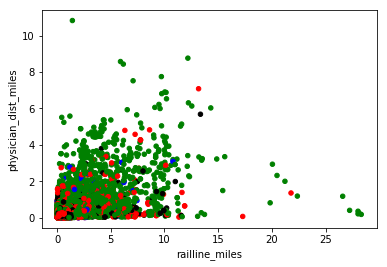

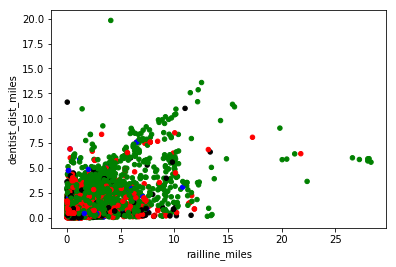

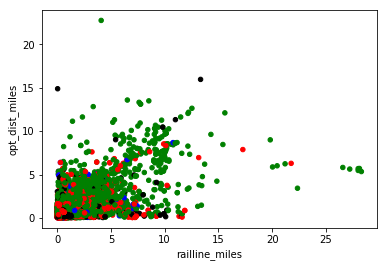

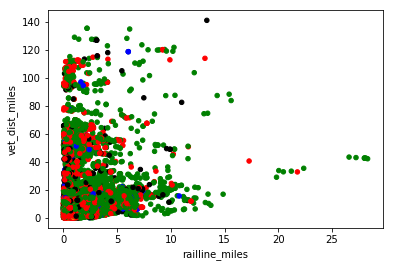

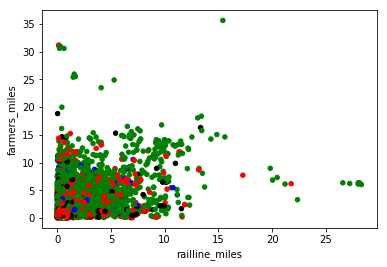

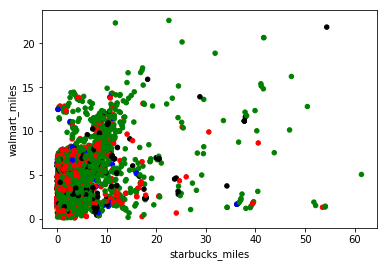

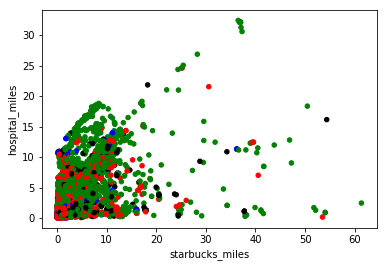

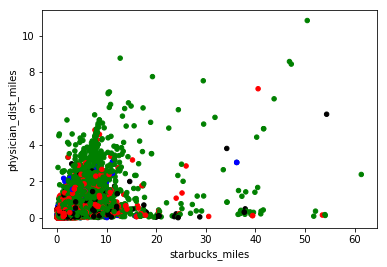

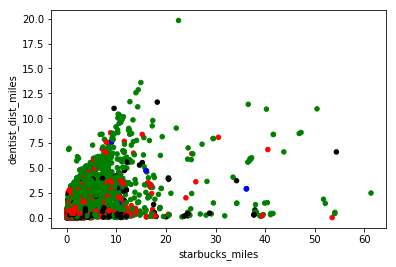

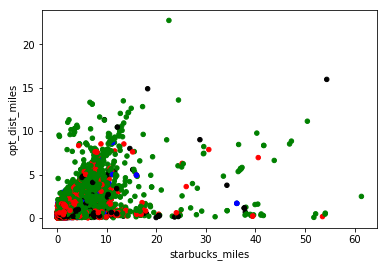

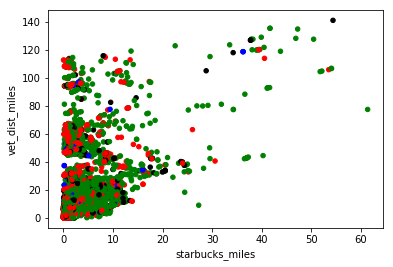

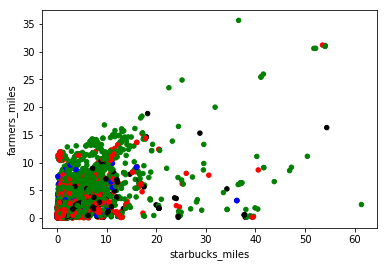

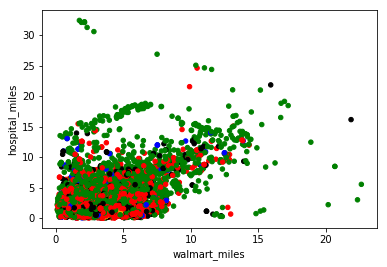

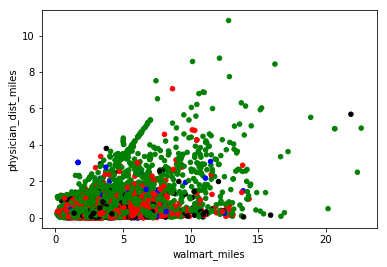

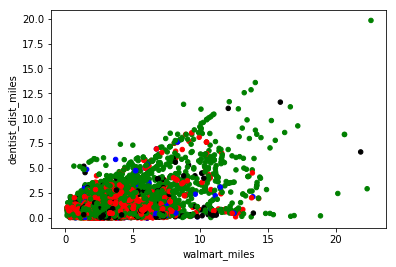

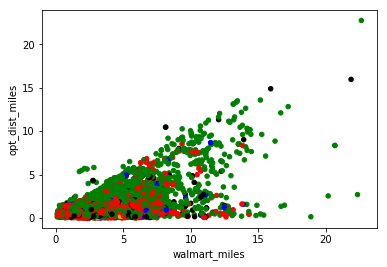

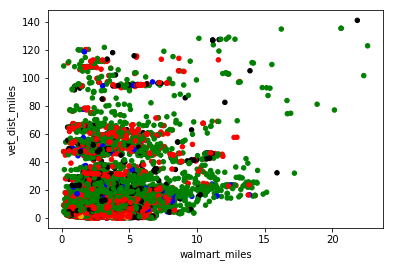

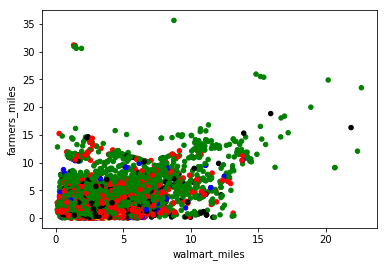

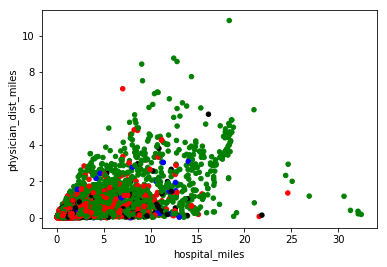

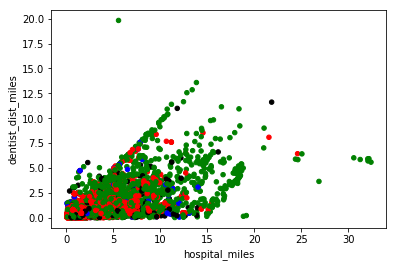

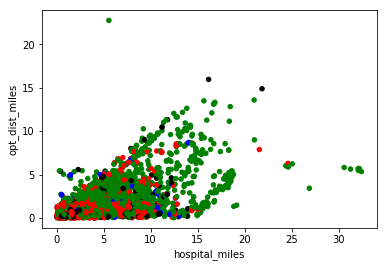

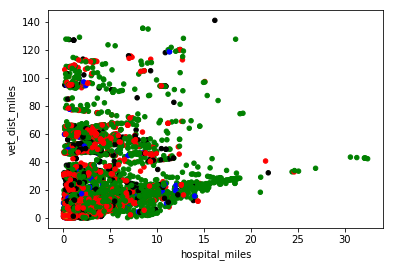

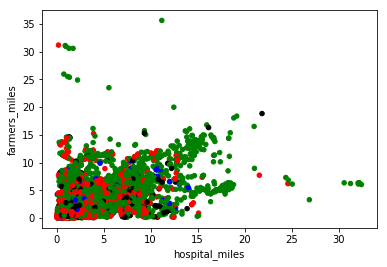

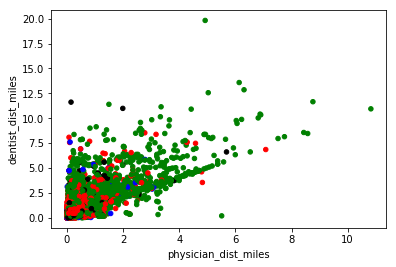

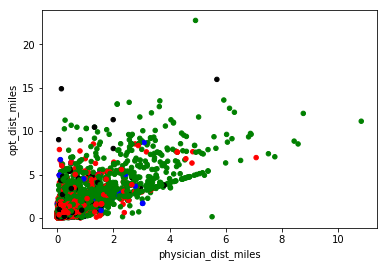

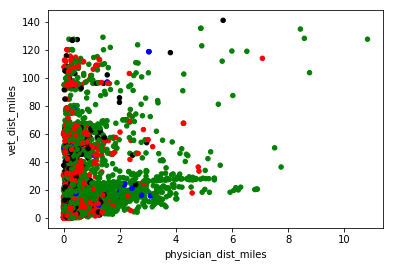

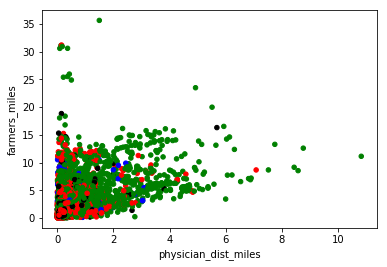

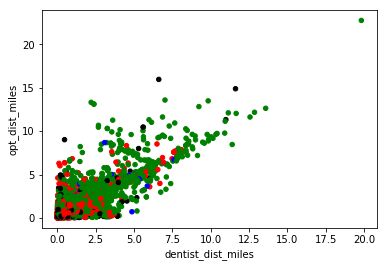

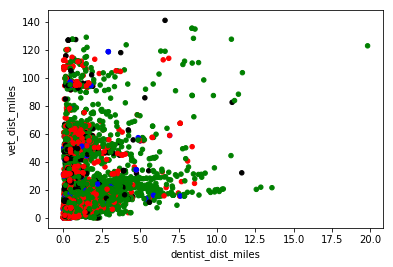

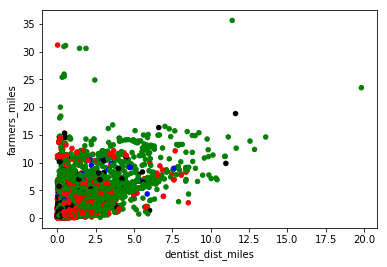

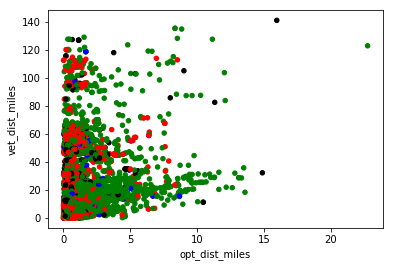

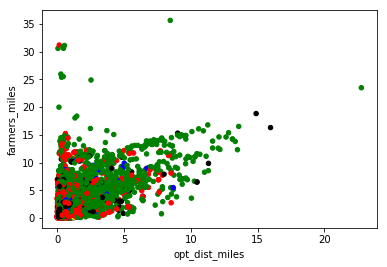

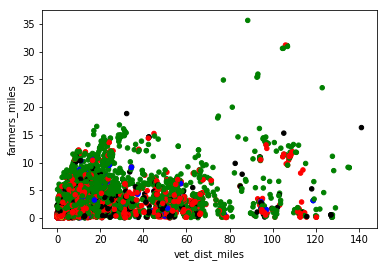

In [18]:
def milesPlot():
    df = getTheCleansedData()
    #miles_list = ['hospital_miles','railline_miles', 'dentist_dist_miles', 'physician_dist_miles', 'opt_dist_miles']
    miles_list = ['cemetery_dist_miles', 'nationalhighway_miles', 'railline_miles', 'starbucks_miles', 'walmart_miles', \
                  'hospital_miles', 'physician_dist_miles', 'dentist_dist_miles', 'opt_dist_miles', 'vet_dist_miles', \
                  'farmers_miles']
    
    #colorMap = {'Condo': 0, 'SFR': 1, 'Duplex': 2, 'NA': 3, 'Quadplex': 4, 'Triplex':5, }
    colorMap = {'Condo': 'red', 'SFR': 'green', 'Duplex': 'black', 'NA': 'blue', 'Quadplex': 'yellow', 'Triplex':'orange', }
    df['property_type_color_map'] = df.property_type.apply(lambda x : colorMap[x])
    list1 = list(df.property_type_color_map)
    #df.property_type_color_map = df.property_type_color_map.astype('category')
    
    already_plotted = []
    for d in miles_list:
        for c in miles_list:
            if d != c:
                if (c,d) not in already_plotted:
                    already_plotted.append((d,c))
                    df.plot.scatter(d,c,c=list1, legend='property_type')#,colormap='viridis')
milesPlot()

In [19]:
def dummy():
    df = getTheCleansedData()
    print(list(df))
    
dummy()

['county', 'city', 'zipcode', 'address', 'state', 'rent', 'latitude', 'longitude', 'cemetery_dist_miles', 'nationalhighway_miles', 'railline_miles', 'starbucks_miles', 'walmart_miles', 'hospital_miles', 'physician_dist_miles', 'dentist_dist_miles', 'opt_dist_miles', 'vet_dist_miles', 'farmers_miles', 'time', 'bed', 'bath', 'halfbath', 'sqft', 'property_type', 'garage', 'yearbuilt', 'pool', 'fireplace', 'patio', 'lotsize', 'Census_MedianIncome', 'CollegeGrads', 'WhiteCollar', 'Schools', 'Unemployment', 'EmploymentDiversity', 'Census_Vacancy', 'Crime_Rate', 'HomePrice', 'property_type_color_map']


C:\Users\padmaraj.bhat\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


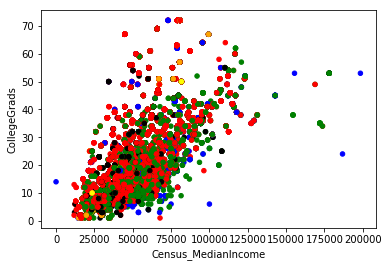

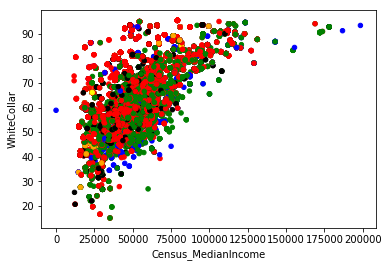

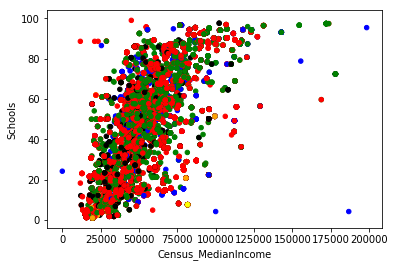

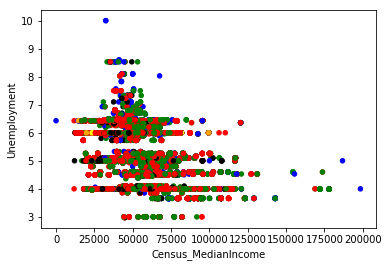

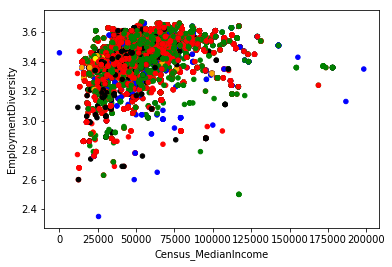

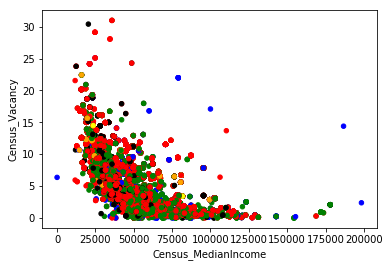

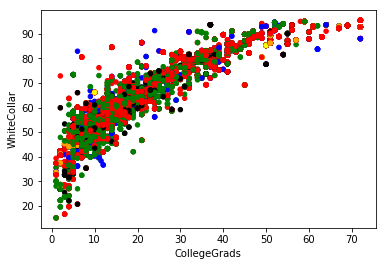

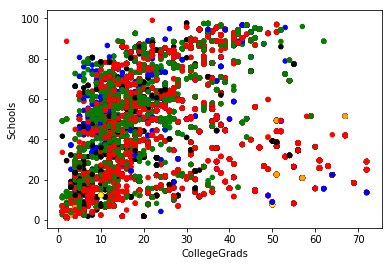

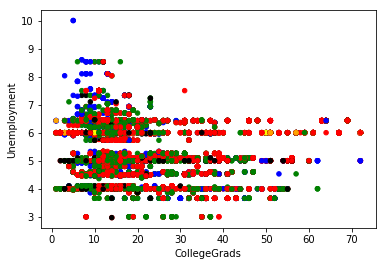

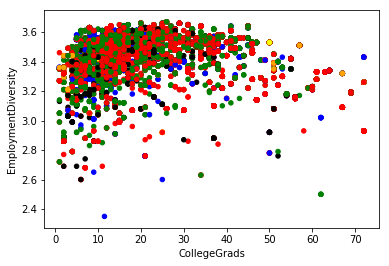

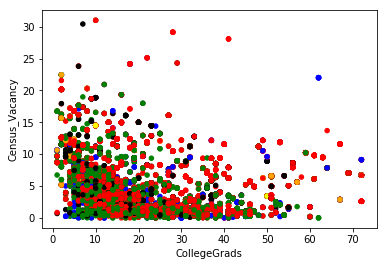

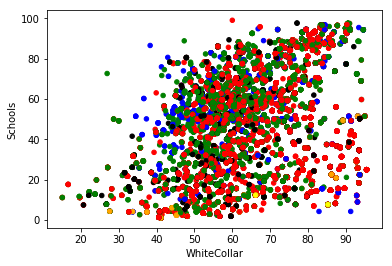

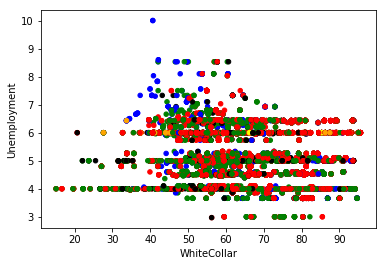

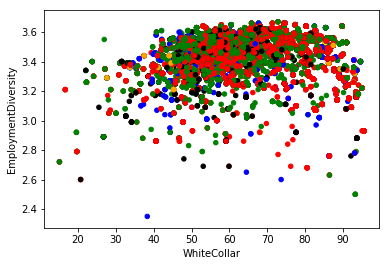

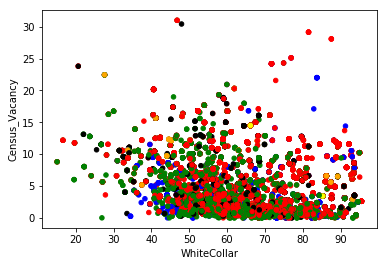

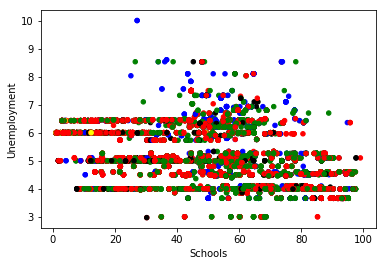

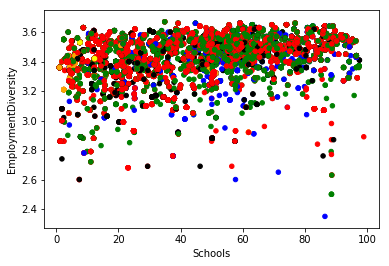

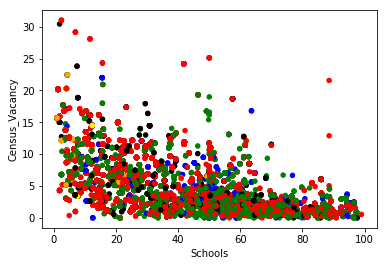

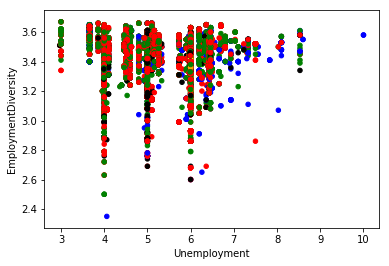

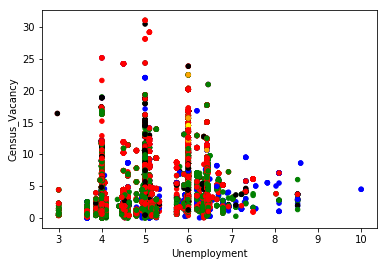

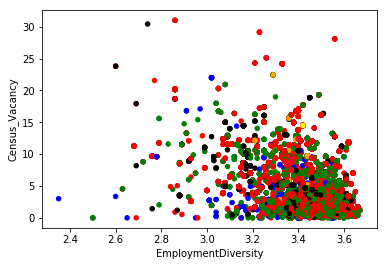

In [24]:
def eduIncome():
    df = getTheCleansedData()
    edu_census_list = ['Census_MedianIncome', 'CollegeGrads', 'WhiteCollar', 'Schools', \
                       'Unemployment', 'EmploymentDiversity', 'Census_Vacancy',]
    list1 = list(df.property_type_color_map)
    done_list =[]
    for c in edu_census_list:
        for d in edu_census_list:
            if c !=d:
                if (d,c) not in done_list:
                    done_list.append((c,d))
                    df.plot.scatter(c,d,c=list1)

eduIncome()